## Mapping Suffolk County, NY Housing Data using Census Map Data
While browsing online, I found [Suffolk County, NY department of Research and Statistics](https://www.suffolkcountyny.gov/Departments/Economic-Development-and-Planning/Planning-and-Environment/Research-and-Statistics/Statistics) provides Excel spreadsheets for many different data sets including one on housing

I decided to use what I have learned in geopands and data visualization to apply this data to a map

In [1]:
# first I imported the necessary libraries for data manipulation and mapping

import numpy as np 
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium as folium
from folium import Choropleth, Circle, Marker

First, get the .shp file from the census data.

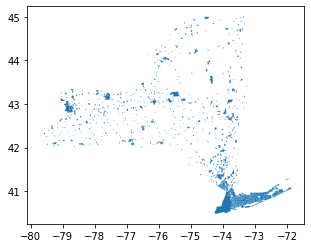

In [2]:
census_blocks = gpd.read_file('tl_2020_36_place10.shp')
census_blocks.plot()
plt.show() # verify our data has been read correctly and can be mapped

In [7]:
suffolk_housing_data = pd.read_csv("/Users/nickgentz/Downloads/Mapping Suffolk Data Files/CENSUS_SUFFOLK_2020_HOUSING.csv", index_col="CDP Name")
suffolk_housing_data

,Total Housing Units,Seasonal Housing Units,% Seasonal,Occupied Housing Units (Households),Owner Occupied Units,Renter Occupied Units,% Owner Occupied,Ave. Household Size,Ave. Owner Household Size,Ave. Renter Household Size,Owner Vacancy Rate,Renter Vacancy Rate,Pop. In Owner Occupied Units,Pop. In Renter Occupied Units,"Vacant Housing Units Sold, Not Occupied",Vacant Housing Units For Sale Only,"Vacant Housing Units Rented, Not Occupied",Vacant Housing Units For Rent
CDP Name,,,,,,,,,,,,,,,,,,
Amagansett CDP,"1,790","1,166",65.1%,513,409,104,79.7%,0.50,0.62,0.07,0.5%,0.0%,913,252,7.0,30.0,2.0,34.0
Amityville village,"3,997",42,1.1%,"3,690","2,617","1,073",70.9%,0.64,0.89,0.01,0.0%,0.0%,"6,611","2,342",7.0,154.0,0.0,45.0
Aquebogue CDP,"1,127",137,12.2%,932,772,160,82.8%,0.51,0.61,0.02,0.1%,0.0%,"1,945",468,3.0,19.0,1.0,18.0
Asharoken village,302,36,11.9%,255,227,28,89.0%,0.27,0.30,0.04,0.0%,0.0%,587,67,1.0,6.0,0.0,2.0
Babylon village,"4,768",43,0.9%,"4,585","3,500","1,085",76.3%,0.47,0.61,0.01,0.0%,0.0%,"9,968","2,138",11.0,31.0,1.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As you can see, the spreadsheet had many columns that were active with no data, these need to be dropped before proceeding

In [8]:
suffolk_housing_data.dropna() #drop the null values

,Total Housing Units,Seasonal Housing Units,% Seasonal,Occupied Housing Units (Households),Owner Occupied Units,Renter Occupied Units,% Owner Occupied,Ave. Household Size,Ave. Owner Household Size,Ave. Renter Household Size,Owner Vacancy Rate,Renter Vacancy Rate,Pop. In Owner Occupied Units,Pop. In Renter Occupied Units,"Vacant Housing Units Sold, Not Occupied",Vacant Housing Units For Sale Only,"Vacant Housing Units Rented, Not Occupied",Vacant Housing Units For Rent
CDP Name,,,,,,,,,,,,,,,,,,
Amagansett CDP,"1,790","1,166",65.1%,513,409,104,79.7%,0.50,0.62,0.07,0.5%,0.0%,913,252,7.0,30.0,2.0,34.0
Amityville village,"3,997",42,1.1%,"3,690","2,617","1,073",70.9%,0.64,0.89,0.01,0.0%,0.0%,"6,611","2,342",7.0,154.0,0.0,45.0
Aquebogue CDP,"1,127",137,12.2%,932,772,160,82.8%,0.51,0.61,0.02,0.1%,0.0%,"1,945",468,3.0,19.0,1.0,18.0
Asharoken village,302,36,11.9%,255,227,28,89.0%,0.27,0.30,0.04,0.0%,0.0%,587,67,1.0,6.0,0.0,2.0
Babylon village,"4,768",43,0.9%,"4,585","3,500","1,085",76.3%,0.47,0.61,0.01,0.0%,0.0%,"9,968","2,138",11.0,31.0,1.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Westhampton Beach village,"2,376","1,553",65.4%,691,437,254,63.2%,0.97,1.51,0.03,0.2%,0.0%,"1,027",662,8.0,36.0,1.0,44.0
Westhampton CDP,"2,120",890,42.0%,"1,045",780,265,74.6%,0.75,0.99,0.06,0.6%,0.0%,"2,093",773,15.0,56.0,5.0,30.0
Wheatley Heights CDP,"1,517",0,0.0%,"1,480","1,265",215,85.5%,0.37,0.43,0.01,0.0%,0.0%,"4,539",542,2.0,14.0,0.0,13.0


#### Now we have the housing data from Suffolk County and the NY State CDP Locations.

It is time to get only the locations for Suffolk County so we can map our data


In [9]:
# get all of the census cdp locations where the Name('NAMELSAD10') is in the housing data
suffolk_cdp_locations = census_blocks[census_blocks['NAMELSAD10'].isin(suffolk_housing_data.index)]

In [10]:
suffolk_cdp_locations
# and it prints out 157 rows just like our suffolk_housing_data, so it found a match for each row

,STATEFP10,PLACEFP10,PLACENS10,GEOID10,NAME10,NAMELSAD10,LSAD10,CLASSFP10,PCICBSA10,PCINECTA10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
105,36,51286,02391019,3651286,Nissequogue,Nissequogue village,47,C1,N,N,G4110,A,9797933,500874,+40.9027162,-073.1862461,"POLYGON ((-73.22967 40.90530, -73.22839 40.905..."
106,36,52188,02391022,3652188,North Haven,North Haven village,47,C1,N,N,G4110,A,7025757,0,+41.0231119,-072.3140213,"POLYGON ((-72.33281 41.03344, -72.33250 41.033..."
107,36,53396,02391026,3653396,Northport,Northport village,47,C1,N,N,G4110,A,5964884,588099,+40.9040451,-073.3449678,"POLYGON ((-73.36106 40.91040, -73.35236 40.919..."
108,36,54617,02391035,3654617,Old Field,Old Field village,47,C1,N,N,G4110,A,5360350,313330,+40.9666734,-073.1310444,"POLYGON ((-73.15911 40.96709, -73.15888 40.967..."
109,36,59157,02391073,3659157,Poquott,Poquott village,47,C1,N,N,G4110,A,1135591,381326,+40.9530438,-073.0908771,"POLYGON ((-73.10042 40.95621, -73.09939 40.957..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1158,36,80302,02390479,3680302,West Islip,West Islip CDP,57,U1,N,N,G4210,S,16325577,1188130,+40.7099426,-073.2960854,"POLYGON ((-73.31839 40.69419, -73.31810 40.695..."
1166,36,80885,02390490,3680885,West Sayville,West Sayville CDP,57,U1,N,N,G4210,S,4971089,513138,+40.7297390,-073.1052004,"POLYGON ((-73.12263 40.72611, -73.12150 40.728..."
1170,36,81419,02390502,3681419,Wheatley Heights,Wheatley Heights CDP,57,U1,N,N,G4210,S,3372743,0,+40.7625055,-073.3704120,"POLYGON ((-73.39256 40.76193, -73.39199 40.762..."
1182,36,83294,02390541,3683294,Wyandanch,Wyandanch CDP,57,U1,N,N,G4210,S,11585822,8646,+40.7468038,-073.3766193,"POLYGON ((-73.40288 40.75947, -73.40277 40.759..."


#### For mapping, it would be best to have the geometry of each location so I will create suffolk_cdp_geometry

In [11]:
# find only the geometry of each location
suffolk_cdp_geometry = suffolk_cdp_locations[["NAMELSAD10", "geometry"]].set_index("NAMELSAD10")
suffolk_cdp_geometry.head()

,geometry
NAMELSAD10,
Nissequogue village,"POLYGON ((-73.22967 40.90530, -73.22839 40.905..."
North Haven village,"POLYGON ((-72.33281 41.03344, -72.33250 41.033..."
Northport village,"POLYGON ((-73.36106 40.91040, -73.35236 40.919..."
Old Field village,"POLYGON ((-73.15911 40.96709, -73.15888 40.967..."
Poquott village,"POLYGON ((-73.10042 40.95621, -73.09939 40.957..."


Since this is a test for mapping the data and to further undertstand the Suffolk County Data set,
we can begin my just mapping the total housing Units for each Town / CDP

In [12]:
# get the number of total housing units and name of each town
# this will be our data for mapping
plot_tot_housing_units = suffolk_housing_data[' Total Housing Units'].value_counts()
plot_tot_housing_units = suffolk_housing_data.groupby(['CDP Name', ' Total Housing Units']).size().reset_index(name='count')
plot_tot_housing_units = plot_tot_housing_units.drop(columns=['count'])

plot_tot_housing_units.head()

,CDP Name,Total Housing Units
0,Amagansett CDP,"1,790"
1,Amityville village,"3,997"
2,Aquebogue CDP,"1,127"
3,Asharoken village,302
4,Babylon village,"4,768"


In [13]:
# small problem, our 'Total Housing Units' is data type: object
plot_tot_housing_units[' Total Housing Units']

0      1,790
1      3,997
2      1,127
3        302
4      4,768
       ...  
152    2,376
153    2,120
154    1,517
155    3,157
156    1,961
Name:  Total Housing Units, Length: 157, dtype: object

In [14]:
# so we remove the commas, and set data type to int 
plot_tot_housing_units[' Total Housing Units'] = plot_tot_housing_units[' Total Housing Units'].str.replace(',', '').astype(int)
plot_tot_housing_units[' Total Housing Units']

0      1790
1      3997
2      1127
3       302
4      4768
       ... 
152    2376
153    2120
154    1517
155    3157
156    1961
Name:  Total Housing Units, Length: 157, dtype: int64

In [15]:
# set base map with folium
m_1 = folium.Map(location=[40.85,-72.777], tiles='cartodbpositron', zoom_start=9)

In [16]:
# add a choropleth map to the base map
# use suffolk CDP geometry for mapping 
# and the housing statistics for the data
Choropleth(
    geo_data=suffolk_cdp_geometry.__geo_interface__,
    data=plot_tot_housing_units,
    columns=['CDP Name', ' Total Housing Units'], # Updated columns parameter
    key_on="feature.id",
    fill_color='YlGnBu',
    legend_name='Total Housing Units'
).add_to(m_1)

# Display the map
m_1

#### Now we have a map to visualize where the most properties in Suffolk County are. Even though this does not provide answers or solutions to problems yet it could give us insight on where to look when mapping other datasets in Suffolk County

Nicholas Gentz